In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import seaborn as sns
from utilities import*

In [2]:
df_train,_ = load_data_from_zip('Data/split.zip',test_size = 0.2,Shuffle=True)

In [3]:
df_train.shape

(1166912, 10)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166912 entries, 1382802 to 993903
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1166912 non-null  object 
 1   vendor_id           1166912 non-null  int64  
 2   pickup_datetime     1166912 non-null  object 
 3   passenger_count     1166912 non-null  int64  
 4   pickup_longitude    1166912 non-null  float64
 5   pickup_latitude     1166912 non-null  float64
 6   dropoff_longitude   1166912 non-null  float64
 7   dropoff_latitude    1166912 non-null  float64
 8   store_and_fwd_flag  1166912 non-null  object 
 9   trip_duration       1166912 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 97.9+ MB


## We have 10 feathers and 1 target let's go through each attribute briefly:

- id: A unique identifier for each trip. It serves as a primary key to distinguish one trip from another.

- vendor_id: A code indicating the provider associated with the trip record. This could represent different taxi companies or service providers.

- pickup_datetime: The date and time when the meter was engaged, marking the start of the trip.

- passenger_count: The number of passengers in the vehicle. It is a driver-entered value, indicating how many individuals were in the taxi during the trip.

- pickup_longitude: The longitude coordinate where the meter was engaged, i.e., the pickup location.

- dropoff_longitude: The longitude coordinate where the meter was disengaged, i.e., the dropoff location.

- dropoff_latitude: The latitude coordinate where the meter was disengaged, i.e., the dropoff location.

- store_and_fwd_flag: This flag indicates whether the data was sent to the vendor in real-time ("N") or whether it was stored in the vehicle's memory and sent later when a connection was available ("Y").

- trip_duration: The duration of the trip in seconds, i.e., the time between the pickup and dropoff.
**Note : trip_duration is our target Variable.**

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1166912.0,1.535141,0.498764,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1166912.0,1.664539,1.314367,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1166912.0,-73.973427,0.062071,-121.933235,-73.991852,-73.981720,-73.967300,-6.133553e+01
pickup_latitude,1166912.0,40.750935,0.033129,34.359695,40.737380,40.754108,40.768360,5.188108e+01
dropoff_longitude,1166912.0,-73.973359,0.061661,-121.933205,-73.991310,-73.979744,-73.962982,-6.133553e+01
dropoff_latitude,1166912.0,40.751828,0.035162,34.359695,40.735893,40.754559,40.769833,4.392103e+01
trip_duration,1166912.0,957.478724,4590.360271,1.000000,397.000000,662.000000,1075.000000,2.227612e+06


#### 1. `vendor_id`
- Only two possible values: **1 or 2** (categorical).
- Distribution is slightly skewed toward vendor **2** (mean ≈ 1.54).
- Should be treated as a **categorical feature**, not numeric.

#### 2. `passenger_count`
- Range: **0 to 7**.
- Typical trips: **1–2 passengers** (median = 1, 75% quantile = 2).
- **Potential issues:**
  - `0` passengers → invalid trips.
  - High values (6–7) are rare and could be anomalies.

#### 3. `pickup_longitude` & `pickup_latitude`
- Central location: around **(-74, 40.75)** → matches **NYC coordinates**.
- Extreme values:
  - Longitude min = **-121.93**, Latitude max = **51.88** → far outside NYC.
- **Most values are tightly clustered around NYC**, but outliers exist and need filtering.

#### 4. `dropoff_longitude` & `dropoff_latitude`
- Similar distribution to pickup points.
- Central cluster: **NYC region**.
- Extreme outliers outside valid NYC bounds.
- Filtering required to keep only realistic trips.

#### 5. `trip_duration`
- Mean = **955 seconds (~16 minutes)**.
- Median = **662 seconds (~11 minutes)**.
- Distribution is **right-skewed** (long trips pull the mean up).
- Extreme values:
  - Min = **1 second** → unrealistic.
  - Max = **2,227,612 seconds (~25 days)** → unrealistic (outlier).

## Lets analyze each feature with target feature

1. **Vendor id**

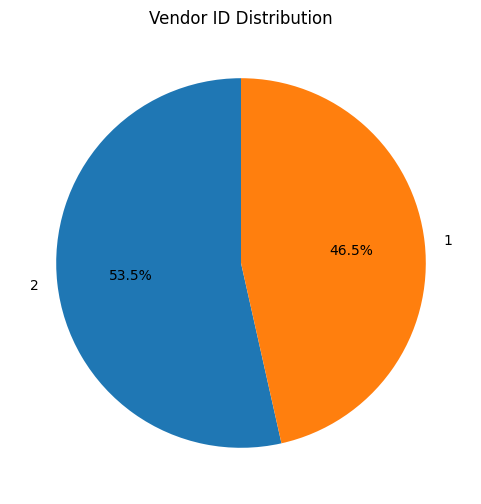

In [6]:
df_train['vendor_id'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Vendor ID Distribution")
plt.ylabel("")  # remove y-label
plt.show()

**They are nearly equal in counts**

2. **Passenger count**

C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\545103476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x="passenger_count", palette="Set2")


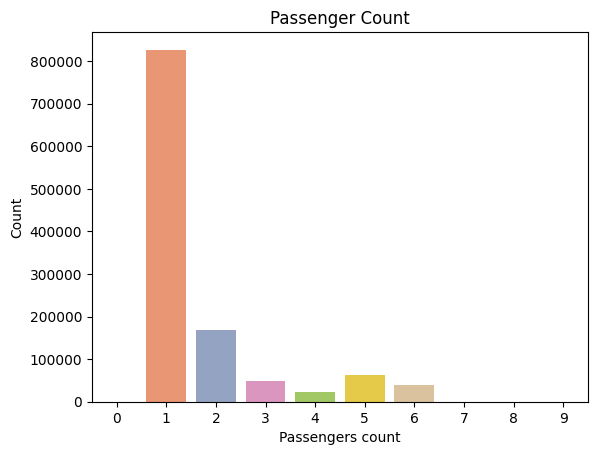

In [7]:
sns.countplot(data=df_train, x="passenger_count", palette="Set2")
plt.title("Passenger Count")
plt.xlabel("Passengers count")
plt.ylabel("Count")
plt.show()

In [8]:
df_train['passenger_count'].value_counts()

passenger_count
1    826911
2    168155
5     62521
3     47923
6     38663
4     22690
0        44
7         3
8         1
9         1
Name: count, dtype: int64

**Most of trips is for one passenger only**

C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\1014825074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x="vendor_id", y='trip_duration', palette='hot', ax=ax1)
C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\1014825074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x= "passenger_count", y= 'trip_duration', palette='magma', ax=ax2)


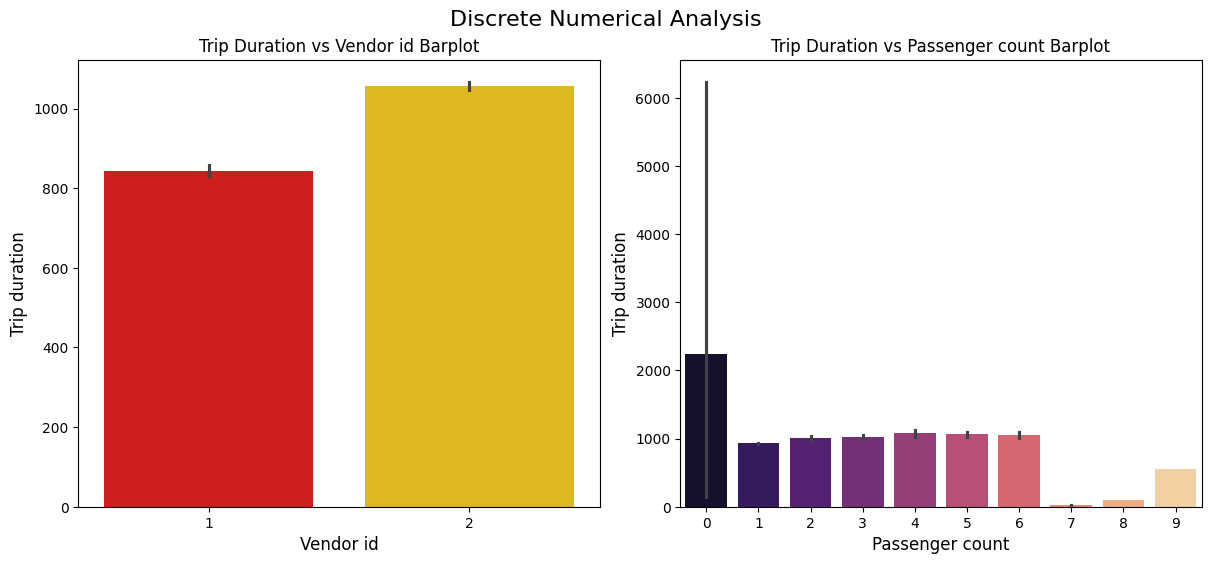

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)

# Subplot 1: Bar Plot for vendor_id
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=df_train, x="vendor_id", y='trip_duration', palette='hot', ax=ax1)
ax1.set_title('Trip Duration vs Vendor id Barplot')
ax1.set_xlabel("Vendor id", fontsize=12)
ax1.set_ylabel("Trip duration", fontsize=12)

# Subplot 2: Bar Plot for passenger_count
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=df_train, x= "passenger_count", y= 'trip_duration', palette='magma', ax=ax2)
ax2.set_title('Trip Duration vs Passenger count Barplot')
ax2.set_xlabel("Passenger count", fontsize=12)
ax2.set_ylabel("Trip duration", fontsize=12)

# Add a title for the entire figure
fig.suptitle("Discrete Numerical Analysis", fontsize=16)

# Show the plots
plt.show()

Clearly passenger_count 0,7,8,9 are outliers they don't even make sense so may be we need to remove them and vendor_id maybe be helpful for model training

3. **Datetime features**

C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\1344832420.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x="season", y="trip_duration", palette="hot", ax=ax1)
C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\1344832420.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x="hour_period_bin", y="trip_duration", palette="magma", ax=ax2)
C:\Users\mosta\AppData\Local\Temp\ipykernel_19364\1344832420.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x="dayofweek", y="trip_duration", palette

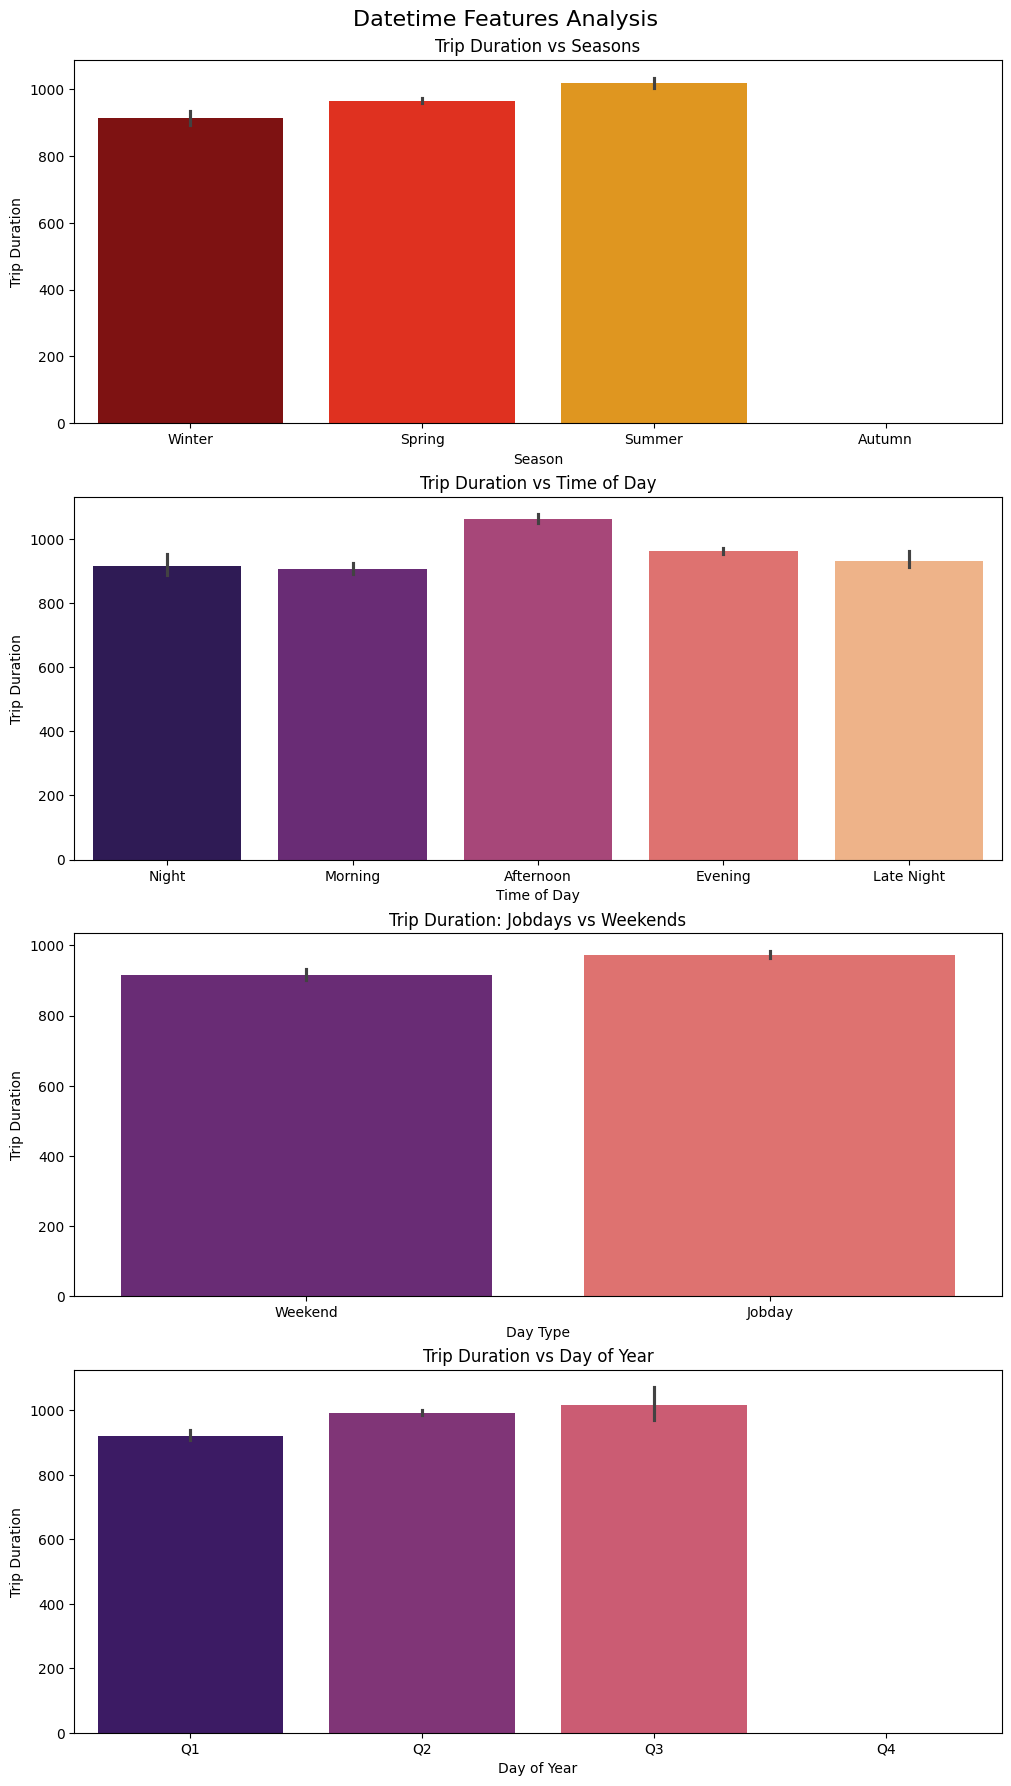

In [10]:
# --- Step 1: Preprocessing and Feature Engineering ---
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])

# Hour bins (Time of day)
hour_bins   = [0, 6, 12, 16, 21, 24]   # cover full 24 hours
hour_labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night']
df_train["hour_period_bin"] = pd.cut(
    df_train["pickup_datetime"].dt.hour,
    bins=hour_bins,
    labels=hour_labels,
    right=False
)

# Day of week: weekday vs weekend
df_train["dayofweek"] = df_train["pickup_datetime"].dt.dayofweek
df_train["dayofweek"] = df_train["dayofweek"].map(
    lambda x: "Weekend" if x >= 5 else "Jobday"
)

# Day of month and day of year
df_train["day"]       = df_train["pickup_datetime"].dt.day

doy_bins   = [0, 90, 180, 270, 365]  
doy_labels = ["Q1", "Q2", "Q3", "Q4"]  

df_train["dayofyear_bin"] = pd.cut(
    df_train["pickup_datetime"].dt.day_of_year,
    bins=doy_bins,
    labels=doy_labels
)

# Month and # Seasons
df_train["month"] = df_train["pickup_datetime"].dt.month

season_bins   = [0, 3, 6, 9, 11]   # Winter(Dec–Feb), Spring, Summer, Autumn
season_labels = ['Winter', 'Spring', 'Summer', 'Autumn']
df_train["season"] = pd.cut(
    df_train["month"],
    bins=season_bins,
    labels=season_labels,
    right=False
)

# --- Step 2: Plotting ---
fig = plt.figure(constrained_layout=True, figsize=(10, 25))
gs = GridSpec(6, 1, figure=fig)

# 1. Trip Duration vs Seasons
ax1 = fig.add_subplot(gs[0, :])
sns.barplot(data=df_train, x="season", y="trip_duration", palette="hot", ax=ax1)
ax1.set_title("Trip Duration vs Seasons")
ax1.set_xlabel("Season")
ax1.set_ylabel("Trip Duration")

# 2. Trip Duration vs Time Period (hour bins)
ax2 = fig.add_subplot(gs[1, :])
sns.barplot(data=df_train, x="hour_period_bin", y="trip_duration", palette="magma", ax=ax2)
ax2.set_title("Trip Duration vs Time of Day")
ax2.set_xlabel("Time of Day")
ax2.set_ylabel("Trip Duration")

# 3. Trip Duration vs Jobday/Weekend
ax3 = fig.add_subplot(gs[2, :])
sns.barplot(data=df_train, x="dayofweek", y="trip_duration", palette="magma", ax=ax3)
ax3.set_title("Trip Duration: Jobdays vs Weekends")
ax3.set_xlabel("Day Type")
ax3.set_ylabel("Trip Duration")

# 4. Trip Duration vs Day of Year
ax6 = fig.add_subplot(gs[3, :])
sns.barplot(data=df_train, x="dayofyear_bin", y="trip_duration", palette="magma", ax=ax6)
ax6.set_title("Trip Duration vs Day of Year")
ax6.set_xlabel("Day of Year")
ax6.set_ylabel("Trip Duration")

# Overall title
fig.suptitle("Datetime Features Analysis", fontsize=16)

plt.show()


In [11]:
df_train['season'].value_counts()

season
Spring    605092
Winter    374331
Summer    187489
Autumn         0
Name: count, dtype: int64

1. Summer has highest trip duration
2. Afternoon has highest trip duration which make sense as at this time every one is returning home from work
3. jobdays has higher trip duration than weekends
4. Quarter 3 of dayofyear is the highest in trip duration

Overall they are all important for our target feature

In [12]:
# # First lets log trip duration

df_train['trip_duration'] = np.log1p(df_train['trip_duration'])

4. **Distance features**

In [13]:
numerical_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']

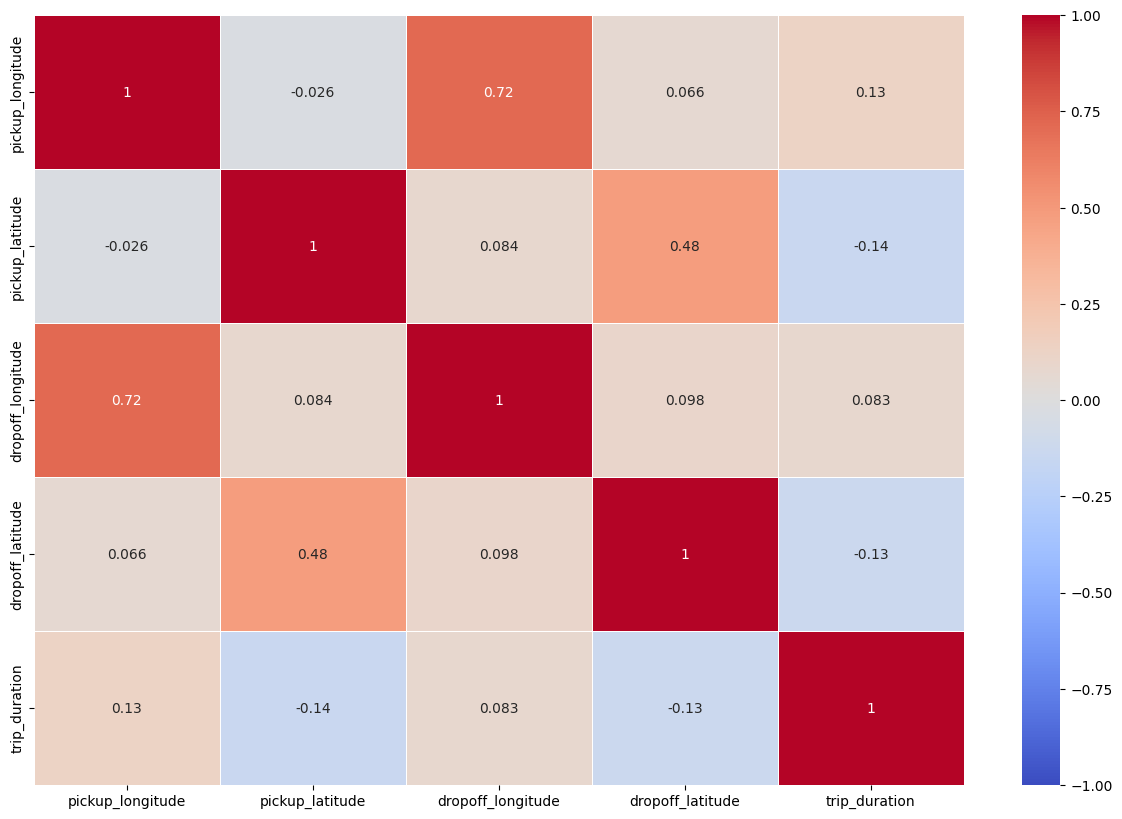

In [14]:
df_corr = df_train[numerical_features]
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

**No Strong correlation here lets start adding some distance features like haversine,manhattan,bearing**

In [15]:
def haversine_distance(df):
    R = 6371.0  # Earth radius in km
    
    lat1 = np.radians(df['pickup_latitude'].values)
    lon1 = np.radians(df['pickup_longitude'].values)
    lat2 = np.radians(df['dropoff_latitude'].values)
    lon2 = np.radians(df['dropoff_longitude'].values)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    dist = R * c  # distance in km
    return np.log1p(dist)

def calculate_direction(df):
    lat1 = np.radians(df['pickup_latitude'].values)
    lon1 = np.radians(df['pickup_longitude'].values)
    lat2 = np.radians(df['dropoff_latitude'].values)
    lon2 = np.radians(df['dropoff_longitude'].values)

    dlon = lon2 - lon1

    y = np.sin(dlon) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)

    bearing = np.degrees(np.arctan2(y, x))
    bearing = (bearing + 360) % 360  # normalize to [0,360)
    return np.log1p(bearing)

def manhattan_distance(df):
    lat1 = np.radians(df['pickup_latitude'].values)
    lat2 = np.radians(df['dropoff_latitude'].values)
    lon1 = np.radians(df['pickup_longitude'].values)
    lon2 = np.radians(df['dropoff_longitude'].values)

    # Approximate conversion: 1 degree latitude ≈ 111 km
    lat_dist = np.abs(df['pickup_latitude'].values - df['dropoff_latitude'].values) * 111
    # Longitude distance depends on latitude
    lon_dist = np.abs(df['pickup_longitude'].values - df['dropoff_longitude'].values) * 111 * np.cos(lat1)

    return np.log1p(lat_dist + lon_dist)

In [16]:
df_train['distance_haversine'] = haversine_distance(df_train)
df_train['direction']          = calculate_direction(df_train)
df_train['distance_manhattan'] = manhattan_distance(df_train)

In [17]:
numerical_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance_haversine','direction','distance_manhattan','trip_duration']

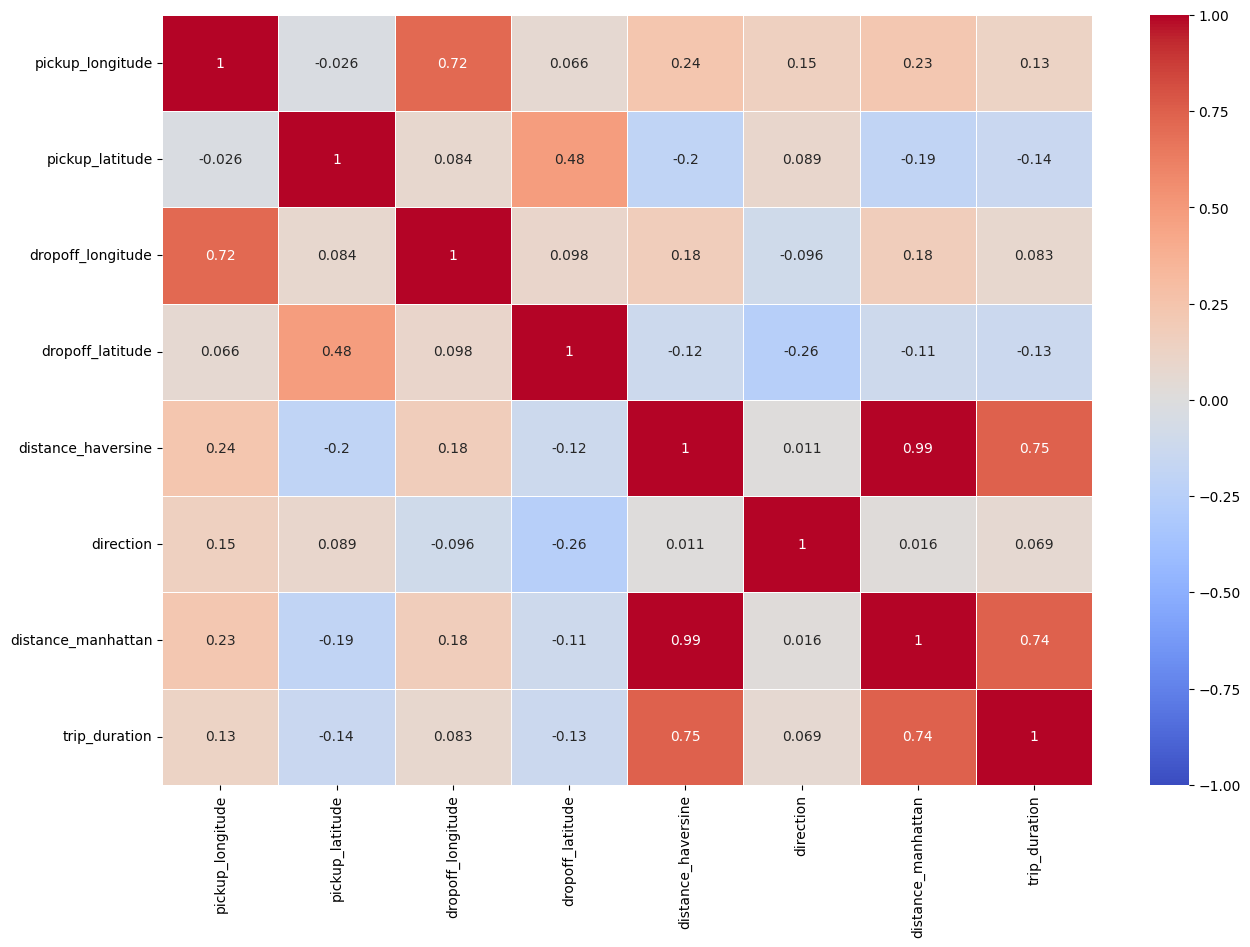

In [18]:
df_corr = df_train[numerical_features]
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

Clearly distance_haversine and distance_manhattan are the most important features for predicting our target feature we can remove the rest